### Loading in the Data and removing unecessary columns

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


securities_df = pd.read_csv('spy_tlt_gld.csv')
securities_df['Date'] = pd.to_datetime(securities_df['Date'], dayfirst=False)
securities_df.set_index('Date', inplace=True)

securities_df.drop({'TLT', 'GLD'}, axis=1, inplace=True)

securities_pct = securities_df.pct_change()
securities_pct.fillna(0, inplace=True)


### Defining the period to use for the moving average and creating a new column that contains the value of the moving average

In [71]:
ma_period = 200


securities_df['sma'] = securities_df.rolling(ma_period).mean()

# Adjusting the DataFrames to only include data once the moving average is calculated (which takes 200 rows)
securities_df = securities_df[ma_period:].copy()
securities_pct = securities_pct[ma_period:].copy()

### Having a quick look at the security price and its 200 day moving average

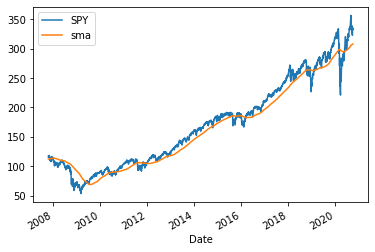

In [72]:
securities_df.plot()

### Creating a position column with a default value of 0 (i.e. no position). When 200 day moving average < SPY price the value for the position column is set to 1

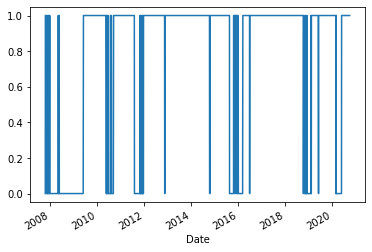

In [73]:
securities_df['position'] = 0

securities_df.loc[securities_df['SPY'].shift(1) > securities_df['sma'], 'position'] = 1

securities_df['position'].plot()

### Multipling the daily percentage change of SPY by the value os positions in the same row - if we are long (positions = 1) the daily pct_change is the same. If positions = 0, we are out of the market

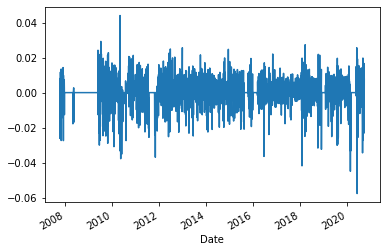

In [80]:
returns = securities_pct['SPY'] * securities_df['position']

returns.plot()

### Setting our initial investment and portfolio_value DataFrame for the backtest

In [82]:
invested = 1000
portfolio_value = invested * np.cumprod(1 + returns)

### Plotting the Equity Curve of the Backtest

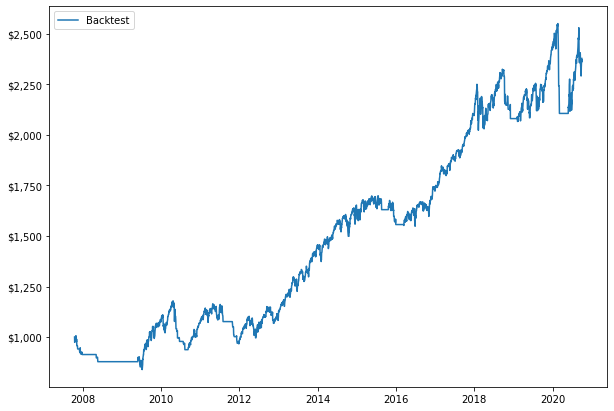

In [83]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig = plt.figure(figsize=(10, 7))

ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(portfolio_value, label='Backtest')

formatter = ticker.StrMethodFormatter('${x:,.0f}')
ax1.yaxis.set_major_formatter(formatter)

ax1.legend()

plt.show()

### Plotting Drawdowns of the Backtest

In [84]:
drawdowns = (portfolio_value['Portfolio'] / portfolio_value['Portfolio'].cummax()) - 1

fig = plt.figure(figsize=(10, 7))

ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(drawdowns, label='Drawdowns')

pct_formatter = ticker.PercentFormatter(1, decimals=0)
ax1.yaxis.set_major_formatter(pct_formatter)

plt.legend()
plt.show()

KeyError: 'Portfolio'